### Import stuff

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import scipy.constants as const
import scipy.integrate as integrate
import mpmath as mp
import copy
import xarray

# import xrft
# import finufft

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from DataContainer.ReadData import read_hdf5_file, read_hdf5_global, read_hdf5_run_time
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from ToolFunction.ToolFunction import *
from Analyser.FitAnalyser import Gaussian2dModel, DensityProfileBEC2dModel
from lmfit.lineshapes import gaussian2d


from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

Li2_vec = np.vectorize(lambda x: np.array(mp.fp.polylog(2, x), dtype=np.complex128))

In [2]:
from dask.distributed import Client
client = Client(n_workers=6, threads_per_worker=4, processes=True, memory_limit='8GB')
client

<Client: 'tcp://127.0.0.1:61965' processes=6 threads=24, memory=44.70 GiB>

## Different f/T
The simulation was peformed for 11 different values for teh condensate fraction f from 0 to 10 and the input temperature was changed according to the formular $f = 1-(T/T_c)^3$ <br>
N = 3.21e5<br>
omgx = 2pi 200 Hz<br>
omgy = 2pi 100 Hz<br>
omgz = 2pi 200 Hz<br>
a = 100 a0 <br>
tof = 20 ms <br>
The simulation was done for a flatfield lightsource and a manual light source.

## Flatfield

### Get the data

In [3]:
# load the simulated data
sim_fT_flatfield_np = np.load("F:/Jianshun/analyseScript/testData/OD_fT_flatfield.npy")
sim_fT_flatfield_np = np.nan_to_num(sim_fT_flatfield_np)
'''
sim_fT_flatfield_x10_np = np.load("C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_flatfield_x10.npy")
sim_fT_flatfield_x10_np = np.nan_to_num(sim_fT_flatfield_x10_np)
sim_fT_flatfield_x100_np = np.load("C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_flatfield_x100.npy")
sim_fT_flatfield_x100_np = np.nan_to_num(sim_fT_flatfield_x100_np)
sim_fT_flatfield_x1000_np = np.load("C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_flatfield_x1000.npy")
sim_fT_flatfield_x1000_np = np.nan_to_num(sim_fT_flatfield_x1000_np)
sim_fT_manual_x1000_np = np.load("C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_manual_x1000.npy")
sim_fT_manual_x1000_np = np.nan_to_num(sim_fT_manual_x1000_np)
sim_fT_manual_x10000_np = np.load("C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_manual_x10000.npy")
sim_fT_manual_x10000_np = np.nan_to_num(sim_fT_manual_x10000_np)
'''


# define axis
x = np.linspace(0, 1201, 1200)
y = np.linspace(0, 1921, 1920)

In [4]:
# crop the data around the center to get manly the area of the cloud
sim_fT_flatfield_np = sim_fT_flatfield_np[0:12, 500:-500, 860:-860]
'''
sim_fT_flatfield_x10_np = sim_fT_flatfield_x10_np[0:12, 550:-550, 910:-910]
sim_fT_flatfield_x100_np = sim_fT_flatfield_x100_np[0:12, 550:-550, 910:-910]
sim_fT_flatfield_x1000_np = sim_fT_flatfield_x1000_np[0:12, 550:-550, 910:-910]
sim_fT_manual_x10000_np = sim_fT_manual_x10000_np[0:12, 550:-550, 910:-910]
'''

f = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x = x[500:-500]
y = y[860:-860]

### Perform the fit

In [5]:
'''
## perform the BEC fit

# set the fit Model
fitModel = DensityProfileBEC2dModel()
fitAnalyser = FitAnalyser(fitModel, fitDim=2)

fit_fT_flatfield_x1000_result = np.empty((11,12))
fit_fT_flatfield_x1000_std = np.empty((11,12))

# tansfer the data into an xarray
for i in range (11):
    print(i)
    sim_fT_flatfield_x1000 = xr.DataArray(
    data = sim_fT_flatfield_x1000_np[i], 
    dims = ["x", "y"],
    coords = dict(
        x = ("x", x),
        y = ("y", y),
        )
    )
    # perform the fit for one simulation with flatfield
    params = fitAnalyser.guess(sim_fT_flatfield_x1000, dask="parallelized")
    fitResult = fitAnalyser.fit(sim_fT_flatfield_x1000, params, dask="parallelized").load()
    fitCurve = fitAnalyser.eval(fitResult, x=x, y=y).load()
    fitValue = fitAnalyser.get_fit_value(fitResult)
    fitStd = fitAnalyser.get_fit_std(fitResult)
    # store the results as numpy array
    fit_fT_flatfield_x1000 = fitCurve.to_numpy()
    fitValue_array = fitValue.to_array()
    fitStd_array = fitStd.to_array()
    fit_fT_flatfield_x1000_result[i] = fitValue_array.to_numpy()
    fit_fT_flatfield_x1000_std[i] = fitStd_array.to_numpy()
'''


'\n## perform the BEC fit\n\n# set the fit Model\nfitModel = DensityProfileBEC2dModel()\nfitAnalyser = FitAnalyser(fitModel, fitDim=2)\n\nfit_fT_flatfield_x1000_result = np.empty((11,12))\nfit_fT_flatfield_x1000_std = np.empty((11,12))\n\n# tansfer the data into an xarray\nfor i in range (11):\n    print(i)\n    sim_fT_flatfield_x1000 = xr.DataArray(\n    data = sim_fT_flatfield_x1000_np[i], \n    dims = ["x", "y"],\n    coords = dict(\n        x = ("x", x),\n        y = ("y", y),\n        )\n    )\n    # perform the fit for one simulation with flatfield\n    params = fitAnalyser.guess(sim_fT_flatfield_x1000, dask="parallelized")\n    fitResult = fitAnalyser.fit(sim_fT_flatfield_x1000, params, dask="parallelized").load()\n    fitCurve = fitAnalyser.eval(fitResult, x=x, y=y).load()\n    fitValue = fitAnalyser.get_fit_value(fitResult)\n    fitStd = fitAnalyser.get_fit_std(fitResult)\n    # store the results as numpy array\n    fit_fT_flatfield_x1000 = fitCurve.to_numpy()\n    fitValue_ar

0
0.3092462503676215
0.028120653587753792
<Parameter 'BEC_amplitude', value=36.39788888382145, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=6.253359378774255, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=5.939879881569993, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=636.0835195600501, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=36.39788888382145, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=36.39788888382145, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


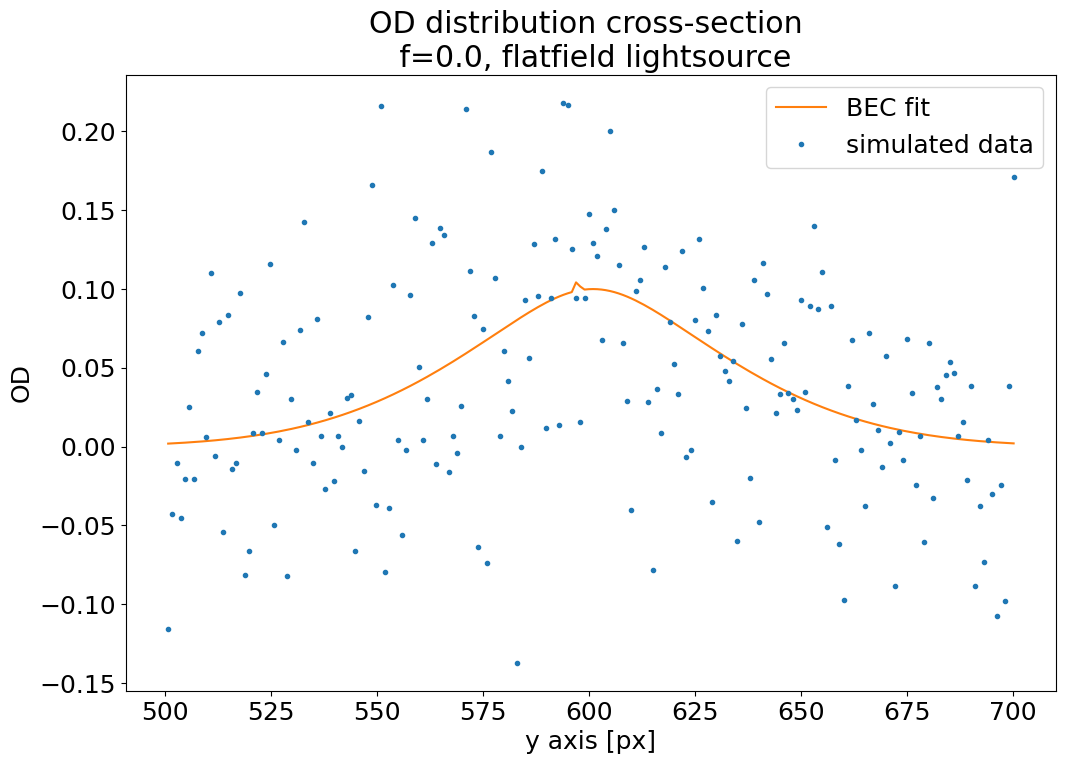

1
0.5528817557540787
0.28214712300392425
<Parameter 'BEC_amplitude', value=98.41779453626728, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=3.3467229538363825, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=2.9910144173151707, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=571.8366157932207, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=98.41779453626728, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=98.41779453626728, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


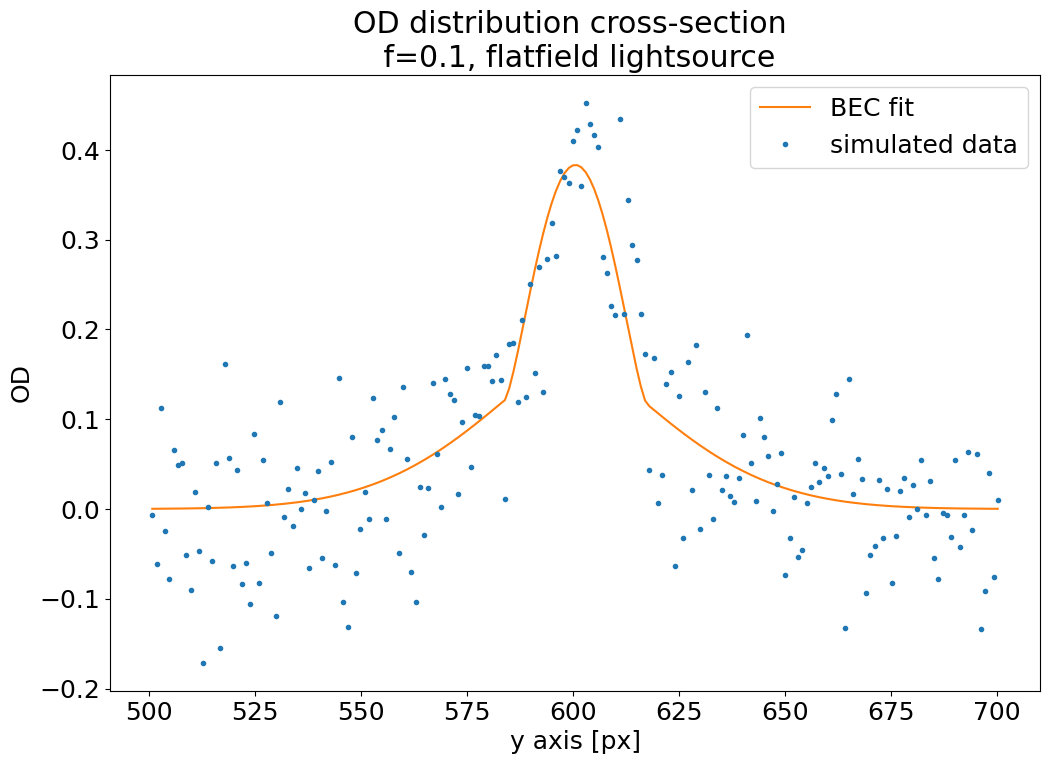

2
0.6676448877490091
0.45280279486430974
<Parameter 'BEC_amplitude', value=204.6134675755257, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=3.858167192178399, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=3.3611224858332776, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=498.1775441243017, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=204.6134675755257, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=204.6134675755257, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


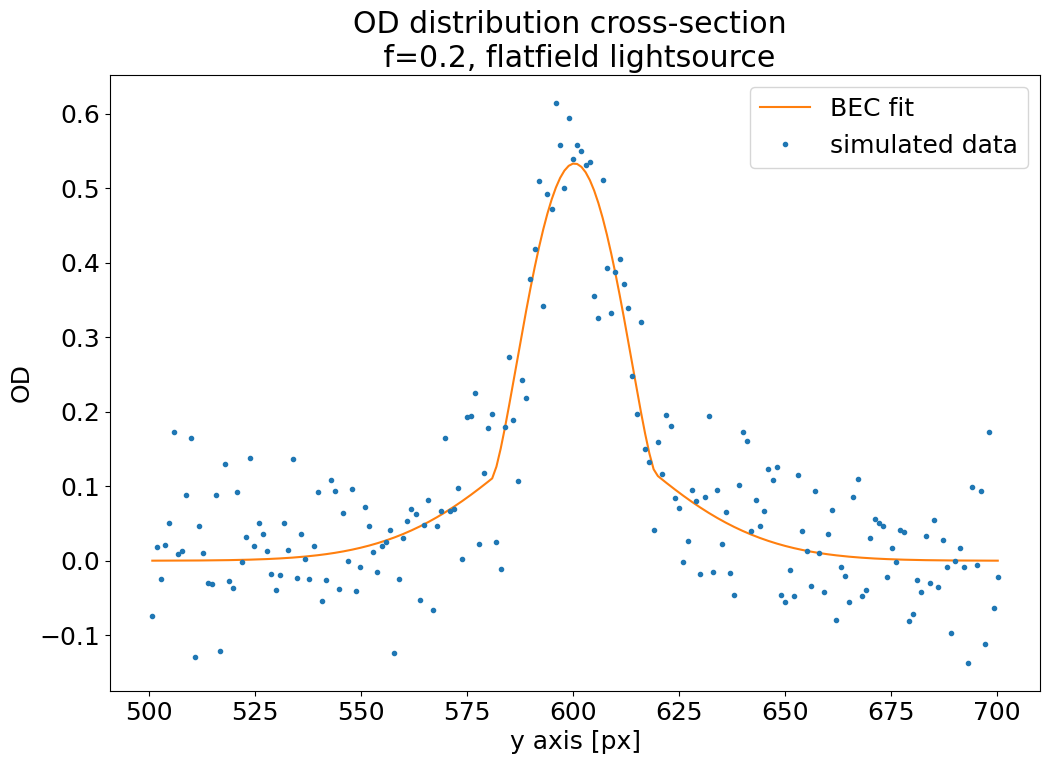

3
0.8209805520698302
0.5698729694548221
<Parameter 'BEC_amplitude', value=314.62838536232505, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.261130378826574, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=3.7182217550401617, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=367.6158038782502, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=314.62838536232505, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=314.62838536232505, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


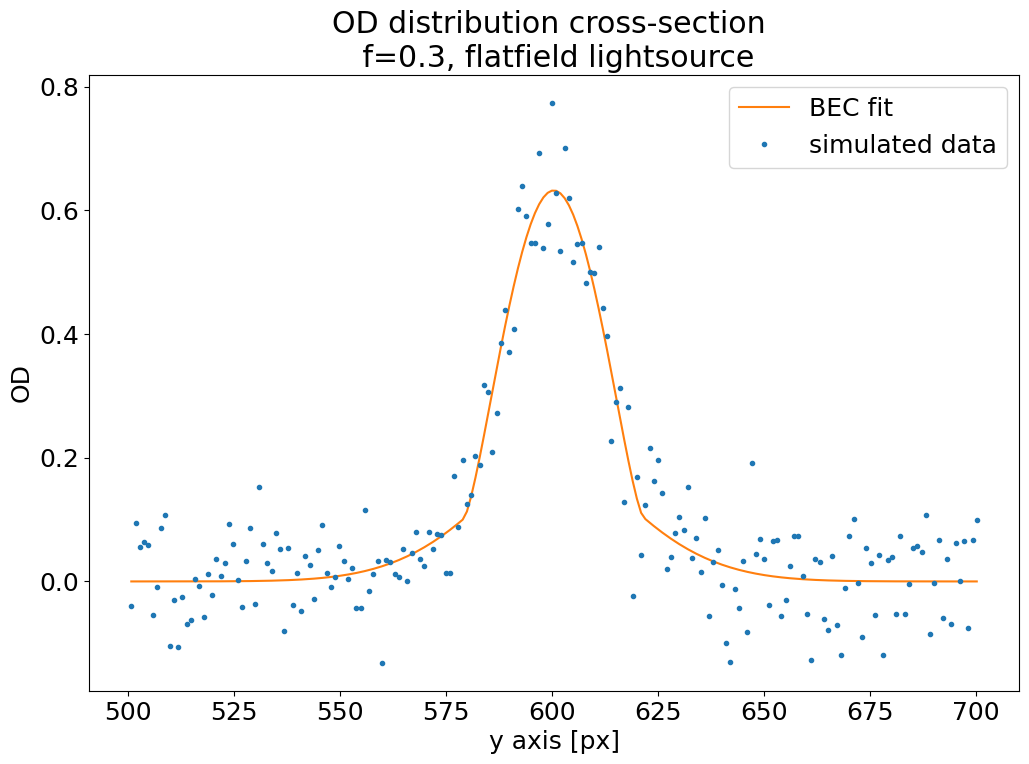

4
0.9524451336942912
0.7133580209950589
<Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.531159303422342, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=3.9948050534083563, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=234.346332071024, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


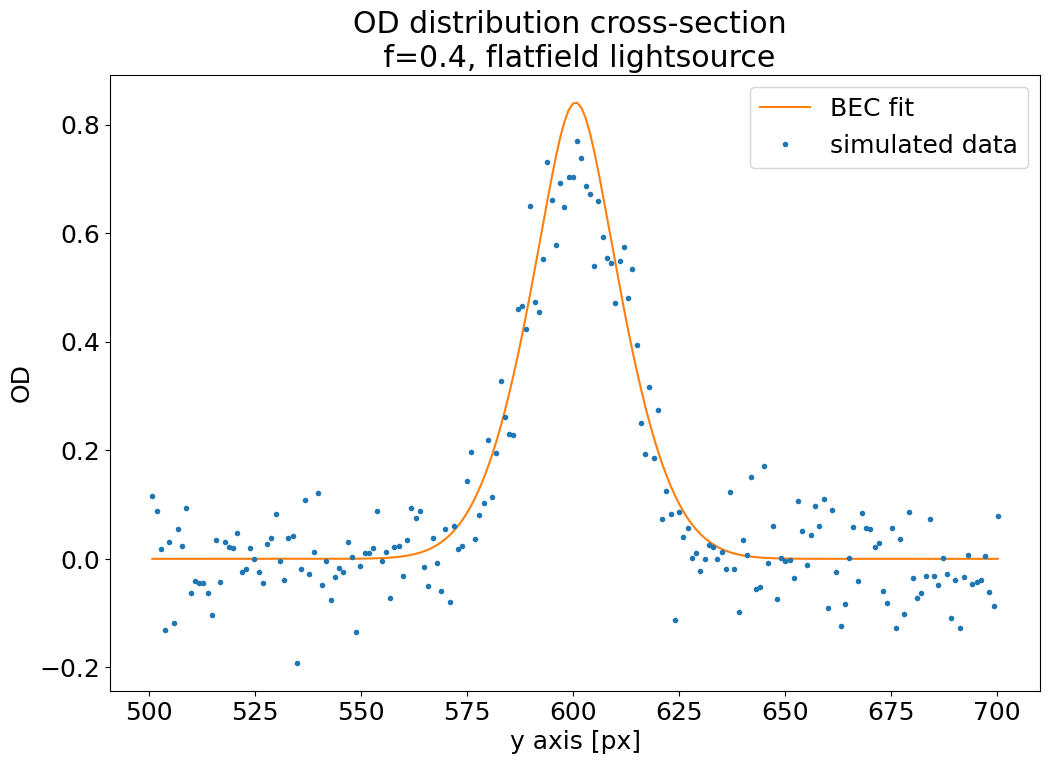

5
0.9679921062510455
0.8353970604407345
<Parameter 'BEC_amplitude', value=556.8529128920721, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.676859970607908, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=4.090095537635108, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=138.73314738692025, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=556.8529128920721, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=556.8529128920721, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


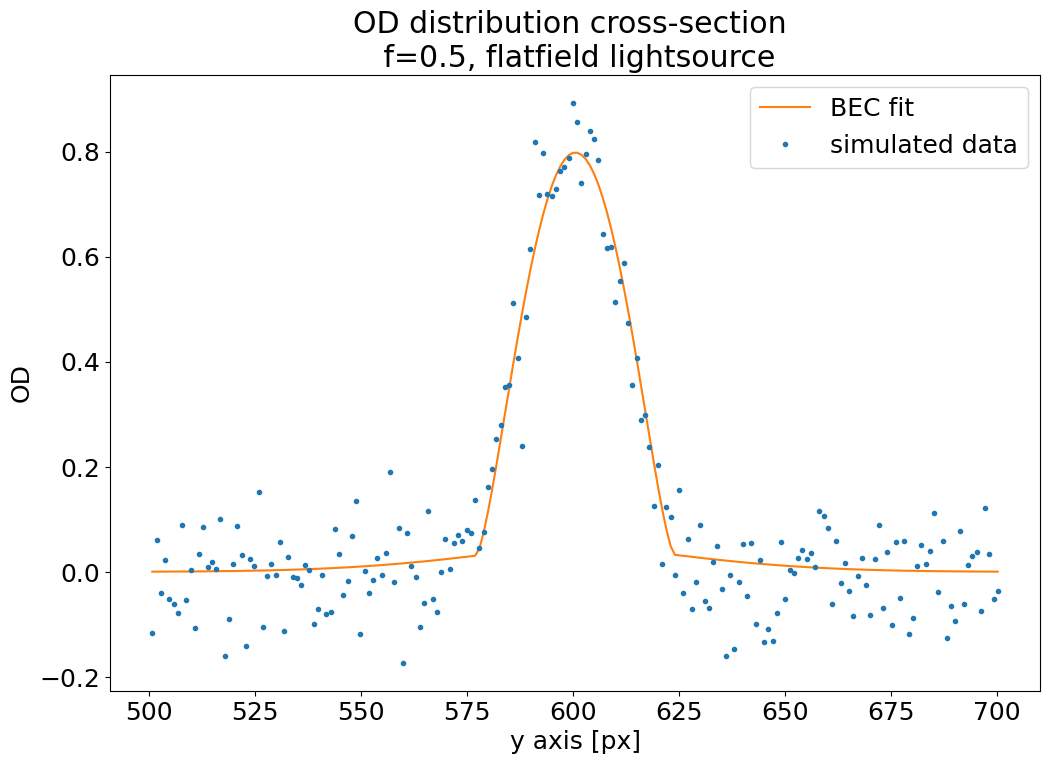

6
111
<Parameter 'thermal_amplitude', value=18.11559956556029, bounds=[0:inf]>
111
1.1007065302712244
0.9474072638704876
<Parameter 'BEC_amplitude', value=676.9280696811649, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.847622882969768, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=4.229774867478724, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=4.6111713076833265, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=676.9280696811649, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=676.9280696811649, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


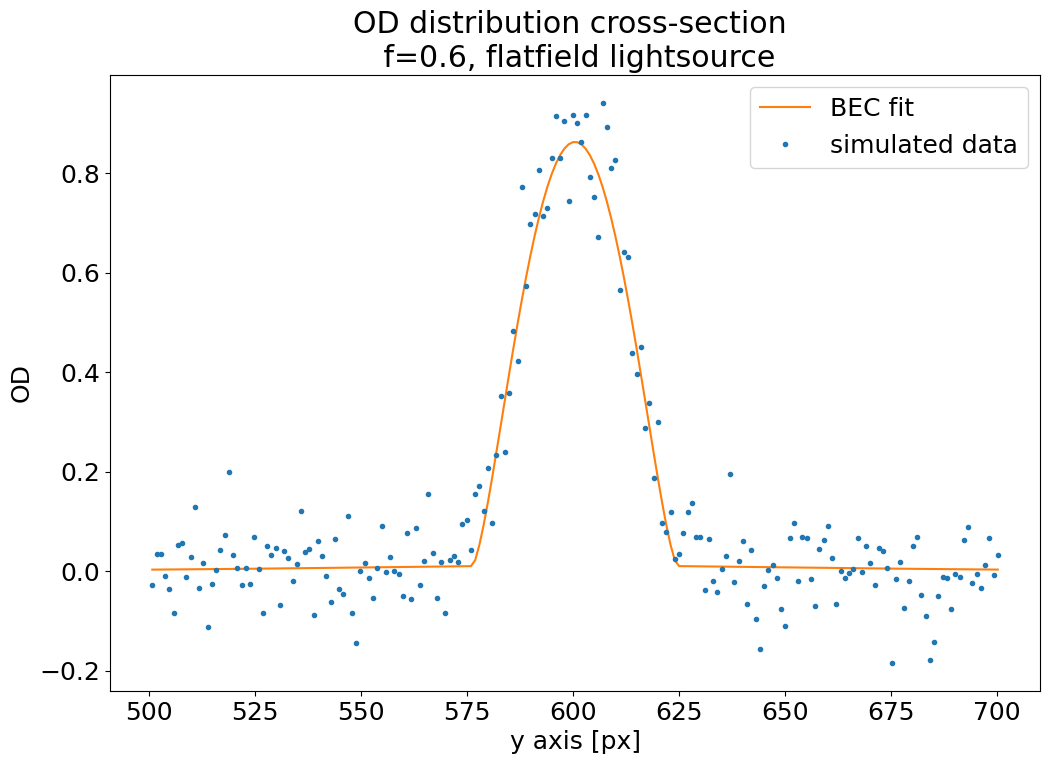

7
111
<Parameter 'thermal_amplitude', value=1.5964361357756474e-05, bounds=[0:inf]>
111
1.1271856611121658
1.0443499897922286
<Parameter 'BEC_amplitude', value=715.9101065602428, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.712712244300954, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=4.174281856530882, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=2.4916588305431375, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=715.9101065602428, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=715.9101065602428, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


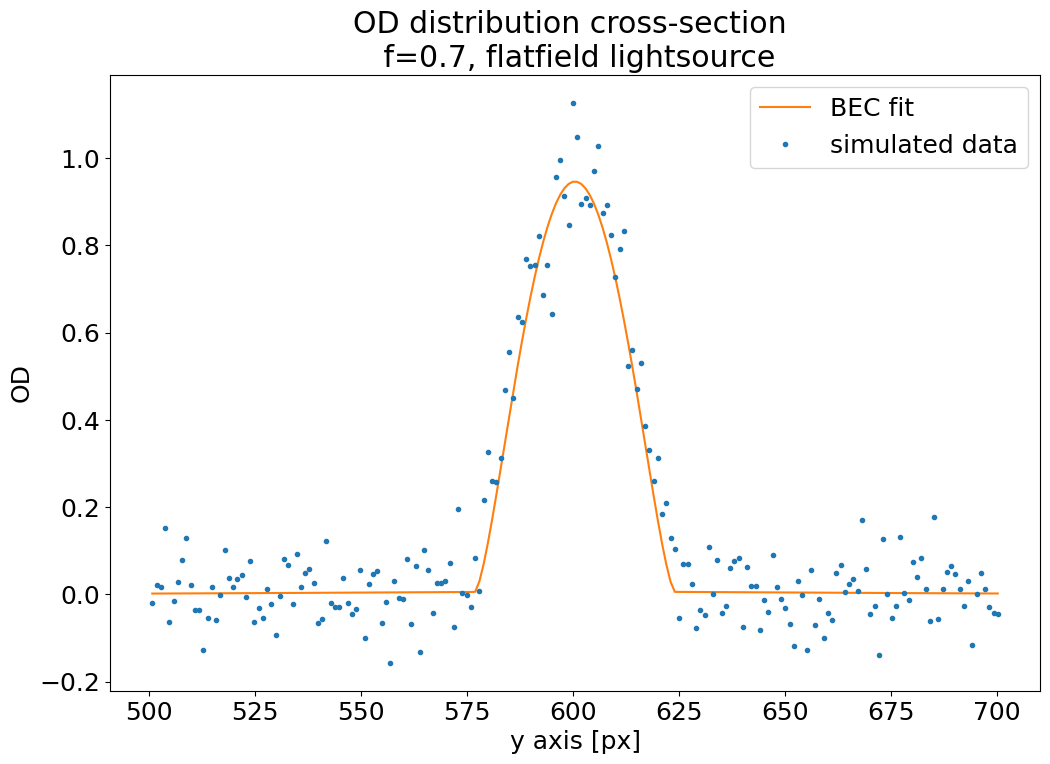

8
111
<Parameter 'thermal_amplitude', value=6.152406713200165e-06, bounds=[0:inf]>
111
1.24761097358594
1.1007144514442881
<Parameter 'BEC_amplitude', value=731.6475562621214, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.684134961245081, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=4.072284625627418, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=4.418579710142679, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=731.6475562621214, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=731.6475562621214, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


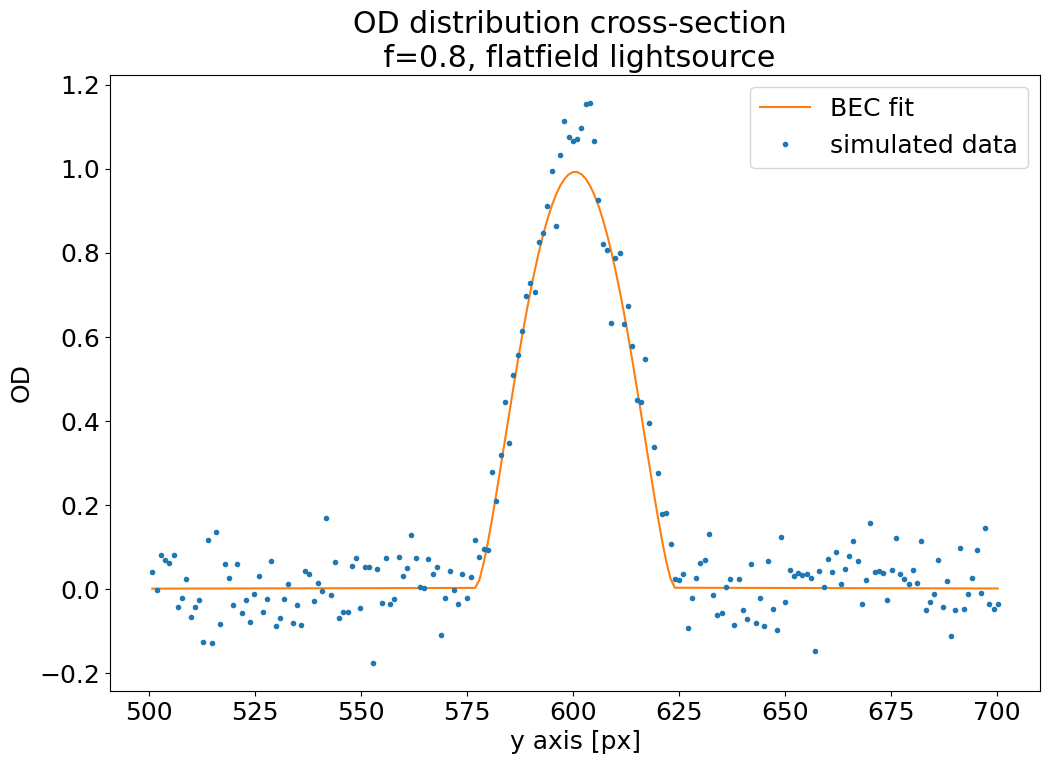

9
111
<Parameter 'thermal_amplitude', value=1.0471999798422615e-06, bounds=[0:inf]>
111
1.2696766909374297
1.1316765124630221
<Parameter 'BEC_amplitude', value=736.2192048064755, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.644189572770608, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=4.019899236706962, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=2.767321194144596, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=736.2192048064755, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=736.2192048064755, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


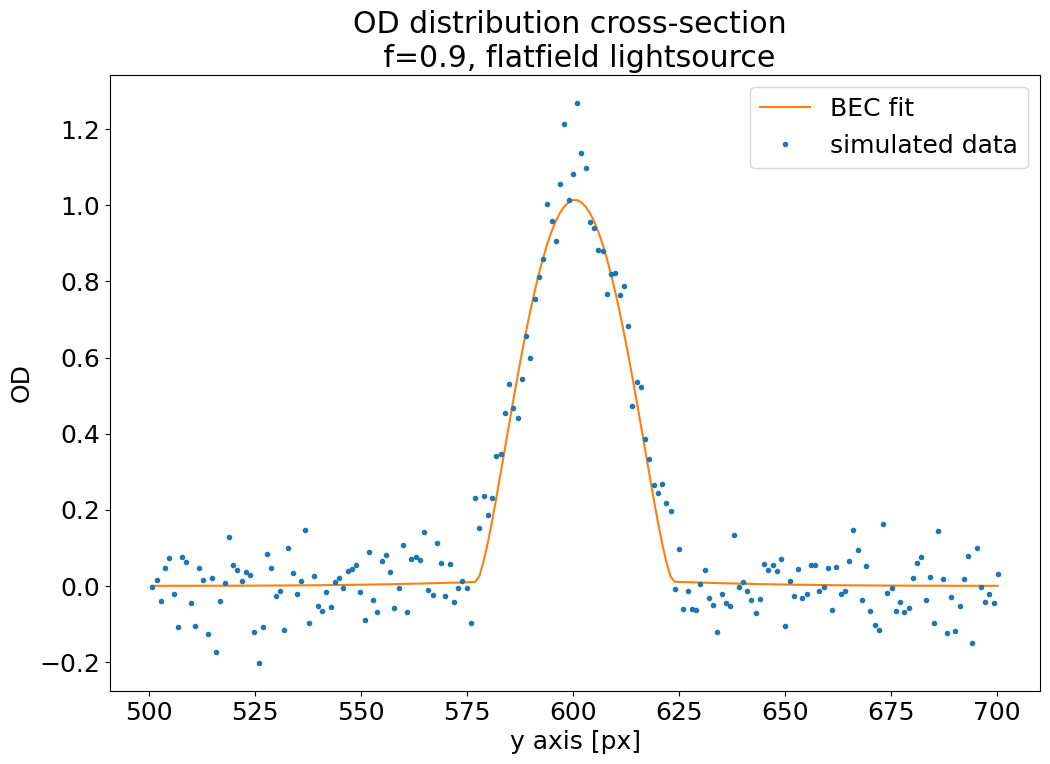

10
111
<Parameter 'thermal_amplitude', value=2.0170076719949748e-09, bounds=[0:inf]>
111
1.0770639524619068
0.9921090880797887
<Parameter 'BEC_amplitude', value=746.360298383822, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=5.030614372702362, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=4.291492331580912, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=2.379912245174944, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=746.360298383822, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=746.360298383822, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


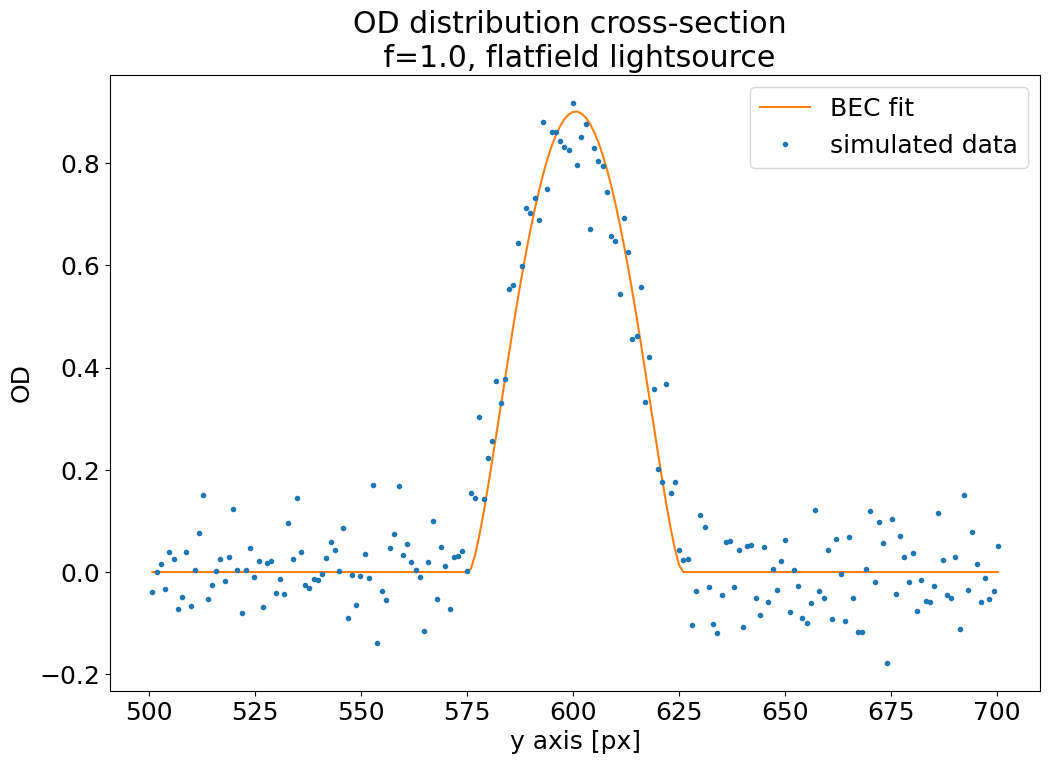

In [6]:
## perform the BEC fit

# set the fit Model
fitModel = DensityProfileBEC2dModel()
fitAnalyser = FitAnalyser(fitModel, fitDim=2)

fit_fT_flatfield_result = np.empty((11,13))
fit_fT_flatfield_std = np.empty((11,13))

# params = fitAnalyser.guess(data_sim, dask="parallelized")
params = fitAnalyser.fitModel.make_params()
params.add(name="A_amplitude", value=  3000, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_centerx", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_centery", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_sigmax", value= 50e-6, max=  0, min=-np.inf, vary=True)
params.add(name="A_sigmay", value=  30e-6, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_amplitude", value=  27000, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_centerx", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_centery", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_sigmax", value=  80e-6, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_sigmay", value=  80e-6, max=np.inf, min=-np.inf, vary=True)

# for i in range (11):
#     print(i)
#     sim_fT_flatfield = xr.DataArray(
#     data = sim_fT_flatfield_np[i], 
#     dims = ["x", "y"],
#     coords = dict(
#         x = ("x", x),
#         y = ("y", y),
#         )
#     )
#     # perform the fit for one simulation with flatfield
#     params = fitAnalyser.guess(sim_fT_flatfield, dask="parallelized", guess_kwargs=dict(pureBECThreshold=1.2))
#     fitResult = fitAnalyser.fit(sim_fT_flatfield, params, dask="parallelized").load()
#     fitCurve = fitAnalyser.eval(fitResult, x=x, y=y).load()
#     fitValue = fitAnalyser.get_fit_value(fitResult)
#     fitStd = fitAnalyser.get_fit_std(fitResult)
#     # store the results as numpy array
#     fit_fT_flatfield = fitCurve.to_numpy()
#     fitValue_array = fitValue.to_array()
#     fitStd_array = fitStd.to_array()
#     fit_fT_flatfield_result[i] = fitValue_array.to_numpy()
#     fit_fT_flatfield_std[i] = fitStd_array.to_numpy()
#     # plot fit
#     plt.figure(figsize=(12,8))
#     plt.errorbar(x, sim_fT_flatfield_np[i,100], fmt = '.', label = "simulated data")
#     plt.plot(x, fit_fT_flatfield[100], label = "BEC fit")
#     plt.xlabel("y axis [px]")
#     plt.ylabel("OD")
#     plt.title("OD distribution cross-section \n f={}, flatfield lightsource".format(str(f[i])))
#     plt.legend()
#     plt.show()

In [ ]:
class DensityProfileBEC2dModel(Model):

    fwhm_factor = 2*np.sqrt(2*np.log(2))
    height_factor = 1./2*np.pi

    def __init__(self, independent_vars=['x', 'y'], prefix='', nan_policy='raise',
                 **kwargs):
        kwargs.update({'prefix': prefix, 'nan_policy': nan_policy,
                       'independent_vars': independent_vars})
        super().__init__(density_profile_BEC_2d, **kwargs)
        self._set_paramhints_prefix()

    def _set_paramhints_prefix(self):
        # self.set_param_hint('BEC_sigmax', min=0)
        self.set_param_hint('deltax', min=0)
        self.set_param_hint('BEC_sigmax', expr=f'3 * {self.prefix}thermal_sigmax - {self.prefix}deltax')
        
        self.set_param_hint('BEC_sigmay', min=0)
        self.set_param_hint('thermal_sigmax', min=0)
        # self.set_param_hint('thermal_sigmay', min=0)
        self.set_param_hint('BEC_amplitude', min=0)
        self.set_param_hint('thermal_amplitude', min=0)
        
        self.set_param_hint('thermalAspectRatio', min=0.8, max=1.2)
        self.set_param_hint('thermal_sigmay', expr=f'{self.prefix}thermalAspectRatio * {self.prefix}thermal_sigmax')
        
        # self.set_param_hint('betax', value=0)
        # self.set_param_hint('BEC_centerx', expr=f'{self.prefix}thermal_sigmax - {self.prefix}betax')
        
        self.set_param_hint('condensate_fraction', expr=f'{self.prefix}BEC_amplitude / ({self.prefix}BEC_amplitude + {self.prefix}thermal_amplitude)')

    def guess(self, data, x, y, negative=False, pureBECThreshold=0.5, noBECThThreshold=0.0, **kwargs):
        """Estimate initial model parameter values from data."""
        fitModel = TwoGaussian2dModel()
        pars = fitModel.guess(data, x=x, y=y, negative=negative)
        pars['A_amplitude'].set(min=0)
        pars['B_amplitude'].set(min=0)
        pars['A_centerx'].set(min=pars['A_centerx'].value - 3 * pars['A_sigmax'], 
                              max=pars['A_centerx'].value + 3 * pars['A_sigmax'],)
        pars['A_centery'].set(min=pars['A_centery'].value - 3 * pars['A_sigmay'], 
                              max=pars['A_centery'].value + 3 * pars['A_sigmay'],)
        pars['B_centerx'].set(min=pars['B_centerx'].value - 3 * pars['B_sigmax'], 
                              max=pars['B_centerx'].value + 3 * pars['B_sigmax'],)
        pars['B_centery'].set(min=pars['B_centery'].value - 3 * pars['B_sigmay'], 
                              max=pars['B_centery'].value + 3 * pars['B_sigmay'],)
        
        fitResult = fitModel.fit(data, x=x, y=y, params=pars, **kwargs)
        pars_guess = fitResult.params
        
        BEC_amplitude = pars_guess['A_amplitude'].value
        thermal_amplitude = pars_guess['B_amplitude'].value
                
        pars = self.make_params(BEC_amplitude=BEC_amplitude,
                                thermal_amplitude=thermal_amplitude, 
                                BEC_centerx=pars_guess['A_centerx'].value, BEC_centery=pars_guess['A_centery'].value,
                                # BEC_sigmax=(pars_guess['A_sigmax'].value / 2.355), 
                                deltax = 3 * (pars_guess['B_sigmax'].value * s2) - (pars_guess['A_sigmax'].value / 2.355),
                                BEC_sigmay=(pars_guess['A_sigmay'].value / 2.355), 
                                thermal_centerx=pars_guess['B_centerx'].value, thermal_centery=pars_guess['B_centery'].value,
                                thermal_sigmax=(pars_guess['B_sigmax'].value * s2), 
                                thermalAspectRatio=(pars_guess['B_sigmax'].value * s2) / (pars_guess['B_sigmay'].value * s2)
                                # thermal_sigmay=(pars_guess['B_sigmay'].value * s2)
                                )
        
        nBEC = pars[f'{self.prefix}BEC_amplitude'] / 2 / np.pi / 5.546 / pars[f'{self.prefix}BEC_sigmay'] / pars[f'{self.prefix}BEC_sigmax']
        if (pars[f'{self.prefix}condensate_fraction']>0.95) and (np.max(data) > 1.05 * nBEC):
            temp = ((np.max(data) - nBEC) * s2pi * pars[f'{self.prefix}thermal_sigmay'] / pars[f'{self.prefix}thermal_sigmax'])
            if temp > pars[f'{self.prefix}BEC_amplitude']:
                pars[f'{self.prefix}thermal_amplitude'].set(value=pars[f'{self.prefix}BEC_amplitude'] / 2)
            else:
                pars[f'{self.prefix}thermal_amplitude'].set(value=temp * 10)
        
        if BEC_amplitude / (thermal_amplitude + BEC_amplitude) > pureBECThreshold:
            pars[f'{self.prefix}thermal_amplitude'].set(value=0)
            pars[f'{self.prefix}BEC_amplitude'].set(value=(thermal_amplitude + BEC_amplitude))
        
        if BEC_amplitude / (thermal_amplitude + BEC_amplitude) < noBECThThreshold:
            pars[f'{self.prefix}BEC_amplitude'].set(value=0)
            pars[f'{self.prefix}thermal_amplitude'].set(value=(thermal_amplitude + BEC_amplitude))
        
        pars[f'{self.prefix}BEC_centerx'].set(
            min=pars[f'{self.prefix}BEC_centerx'].value - 10 * pars[f'{self.prefix}BEC_sigmax'].value,
            max=pars[f'{self.prefix}BEC_centerx'].value + 10 * pars[f'{self.prefix}BEC_sigmax'].value,  
        )
        
        pars[f'{self.prefix}thermal_centerx'].set(
            min=pars[f'{self.prefix}thermal_centerx'].value - 3 * pars[f'{self.prefix}thermal_sigmax'].value,
            max=pars[f'{self.prefix}thermal_centerx'].value + 3 * pars[f'{self.prefix}thermal_sigmax'].value,  
        )
        
        pars[f'{self.prefix}BEC_centery'].set(
            min=pars[f'{self.prefix}BEC_centery'].value - 10 * pars[f'{self.prefix}BEC_sigmay'].value,
            max=pars[f'{self.prefix}BEC_centery'].value + 10 * pars[f'{self.prefix}BEC_sigmay'].value,  
        )
        
        pars[f'{self.prefix}thermal_centery'].set(
            min=pars[f'{self.prefix}thermal_centery'].value - 3 * pars[f'{self.prefix}thermal_sigmay'].value,
            max=pars[f'{self.prefix}thermal_centery'].value + 3 * pars[f'{self.prefix}thermal_sigmay'].value,  
        )
        
        pars[f'{self.prefix}BEC_sigmay'].set(
            max=5 * pars[f'{self.prefix}BEC_sigmay'].value,  
        )
        
        pars[f'{self.prefix}thermal_sigmax'].set(
            max=5 * pars[f'{self.prefix}thermal_sigmax'].value,   
        )
        
        return update_param_vals(pars, self.prefix, **kwargs)

4
0.9524451336942912
0.7133580209950589
<Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>
<Parameter 'BEC_sigmay', value=4.531159303422342, bounds=[0:inf]>
<Parameter 'BEC_sigmax', value=3.9948050534083563, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>
<Parameter 'thermal_amplitude', value=234.346332071024, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>
<Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>


f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:86: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


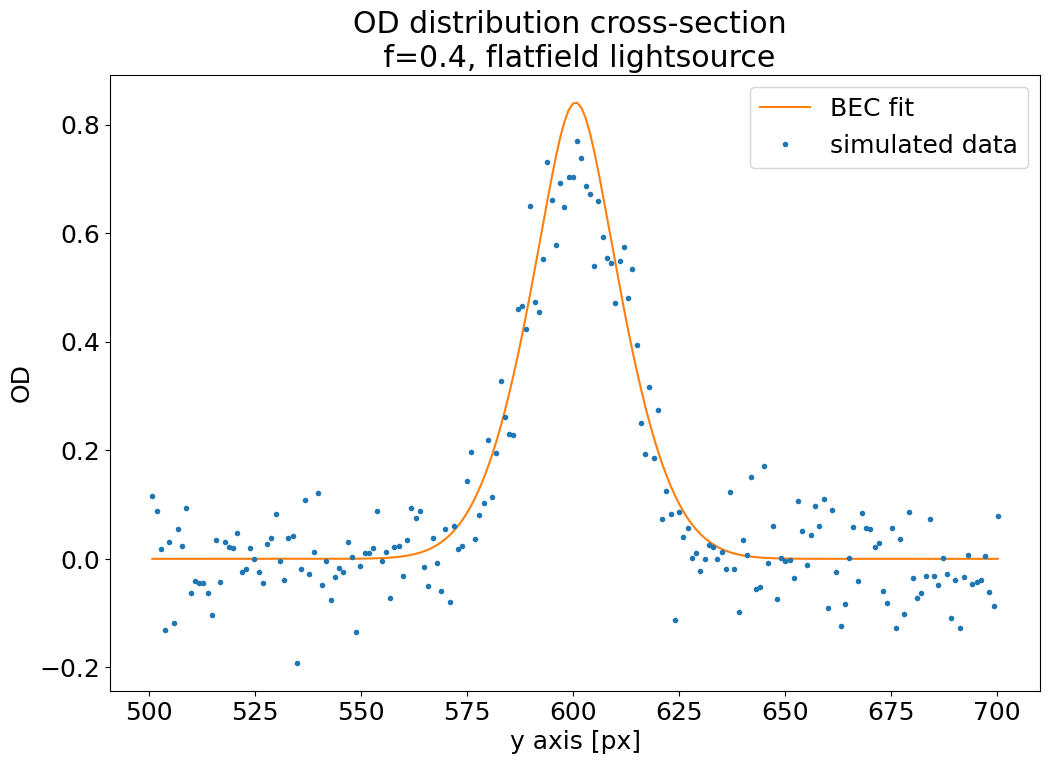

Parameters([('BEC_amplitude', <Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>), ('thermal_amplitude', <Parameter 'thermal_amplitude', value=234.346332071024, bounds=[0:inf]>), ('BEC_centerx', <Parameter 'BEC_centerx', value=600.4901284357314, bounds=[560.5420779016479:640.438178969815]>), ('BEC_centery', <Parameter 'BEC_centery', value=960.6538995040197, bounds=[915.3423064697963:1005.9654925382431]>), ('thermal_centerx', <Parameter 'thermal_centerx', value=600.3018356023492, bounds=[499.70580257202505:700.8978686326734]>), ('thermal_centery', <Parameter 'thermal_centery', value=960.5575103290612, bounds=[858.7135761857239:1062.4014444723985]>), ('BEC_sigmax', <Parameter 'BEC_sigmax', value=3.9948050534083563, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>), ('BEC_sigmay', <Parameter 'BEC_sigmay', value=4.531159303422342, bounds=[0:22.65579651711171]>), ('thermal_sigmax', <Parameter 'thermal_sigmax', value=33.53201101010806, bounds=[0:167.66005505054028]>)

In [24]:
i = 4
print(i)
sim_fT_flatfield = xr.DataArray(
data = sim_fT_flatfield_np[i], 
dims = ["x", "y"],
coords = dict(
    x = ("x", x),
    y = ("y", y),
    )
)
# perform the fit for one simulation with flatfield
params = fitAnalyser.guess(sim_fT_flatfield, dask="parallelized", guess_kwargs=dict(pureBECThreshold=20))
fitResult = fitAnalyser.fit(sim_fT_flatfield, params, dask="parallelized").load()
fitCurve = fitAnalyser.eval(fitResult, x=x, y=y).load()
fitValue = fitAnalyser.get_fit_value(fitResult)
fitStd = fitAnalyser.get_fit_std(fitResult)
# store the results as numpy array
fit_fT_flatfield = fitCurve.to_numpy()
fitValue_array = fitValue.to_array()
fitStd_array = fitStd.to_array()
fit_fT_flatfield_result[i] = fitValue_array.to_numpy()
fit_fT_flatfield_std[i] = fitStd_array.to_numpy()
# plot fit
plt.figure(figsize=(12,8))
plt.errorbar(x, sim_fT_flatfield_np[i,100], fmt = '.', label = "simulated data")
plt.plot(x, fit_fT_flatfield[100], label = "BEC fit")
plt.xlabel("y axis [px]")
plt.ylabel("OD")
plt.title("OD distribution cross-section \n f={}, flatfield lightsource".format(str(f[i])))
plt.legend()
plt.show()

print(params.item())

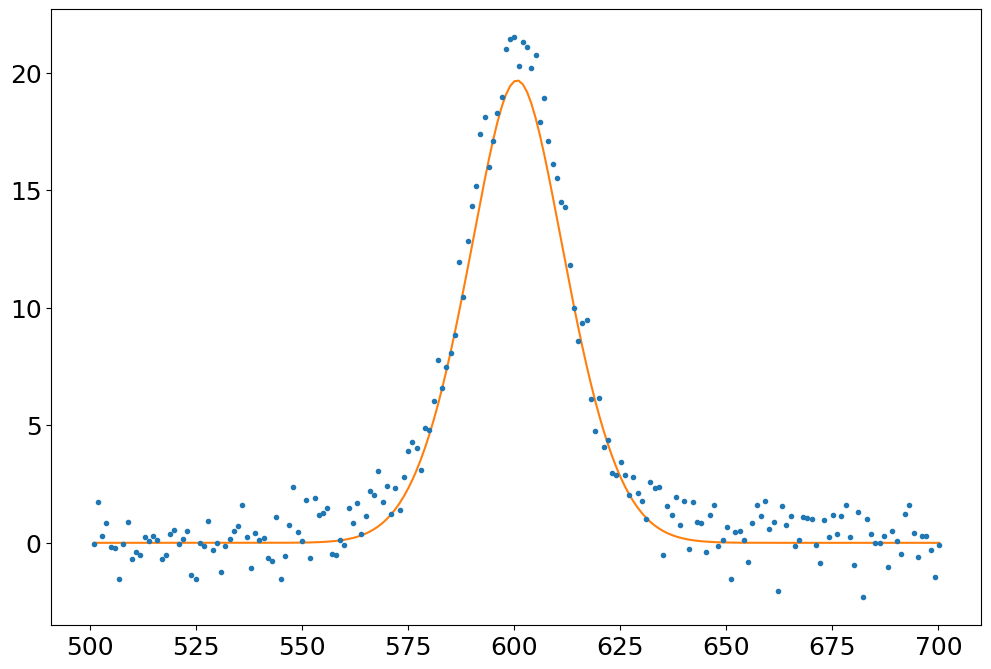

In [25]:
plt.figure(figsize=(12,8))
plt.errorbar(x, np.sum(sim_fT_flatfield_np[i], axis=0), fmt = '.', label = "simulated data")
plt.plot(x, np.sum(fit_fT_flatfield, axis=0), label = "BEC fit")
plt.show()

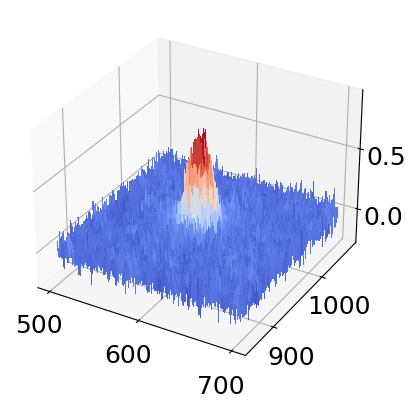

In [26]:
from matplotlib import cm

X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, sim_fT_flatfield_np[i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# plt.plot(x, fit_fT_flatfield[100], label = "BEC fit")
# plt.xlabel("y axis [px]")
# plt.ylabel("OD")
# plt.title("OD distribution cross-section \n f={}, flatfield lightsource".format(str(f[i])))
# plt.legend()
plt.show()

In [27]:
params.item()

Parameters([('BEC_amplitude', <Parameter 'BEC_amplitude', value=449.95823450592684, bounds=[0:inf]>), ('thermal_amplitude', <Parameter 'thermal_amplitude', value=234.346332071024, bounds=[0:inf]>), ('BEC_centerx', <Parameter 'BEC_centerx', value=600.4901284357314, bounds=[560.5420779016479:640.438178969815]>), ('BEC_centery', <Parameter 'BEC_centery', value=960.6538995040197, bounds=[915.3423064697963:1005.9654925382431]>), ('thermal_centerx', <Parameter 'thermal_centerx', value=600.3018356023492, bounds=[499.70580257202505:700.8978686326734]>), ('thermal_centery', <Parameter 'thermal_centery', value=960.5575103290612, bounds=[858.7135761857239:1062.4014444723985]>), ('BEC_sigmax', <Parameter 'BEC_sigmax', value=3.9948050534083563, bounds=[-inf:inf], expr='3 * thermal_sigmax - deltax'>), ('BEC_sigmay', <Parameter 'BEC_sigmay', value=4.531159303422342, bounds=[0:22.65579651711171]>), ('thermal_sigmax', <Parameter 'thermal_sigmax', value=33.53201101010806, bounds=[0:167.66005505054028]>), ('thermal_sigmay', <Parameter 'thermal_sigmay', value=33.94797804777908, bounds=[-inf:inf], expr='thermalAspectRatio * thermal_sigmax'>), ('deltax', <Parameter 'deltax', value=96.60122797691582, bounds=[0:inf]>), ('thermalAspectRatio', <Parameter 'thermalAspectRatio', value=1.012405072798814, bounds=[0.8:1.2]>), ('condensate_fraction', <Parameter 'condensate_fraction', value=0.6575408911220945, bounds=[-inf:inf], expr='BEC_amplitude / (BEC_amplitude + thermal_amplitude)'>)])

In [28]:
fitAnalyser.get_fit_full_result(fitResult)

C:\Users\data\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2246: RuntimeWarning: invalid value encountered in _get_fit_full_result_single (vectorized)
  outputs = ufunc(*inputs)


<xarray.Dataset>
Dimensions:              ()
Data variables: (12/13)
    BEC_amplitude        object 0.0005808768046449142+/-nan
    thermal_amplitude    object 588.5963406894194+/-nan
    BEC_centerx          object 600.511601780056+/-nan
    BEC_centery          object 960.6113364263412+/-nan
    thermal_centerx      object 600.4841611552301+/-nan
    thermal_centery      object 960.6425220578551+/-nan
    ...                   ...
    BEC_sigmay           object 5.279015683706861+/-nan
    thermal_sigmax       object 11.152763795479629+/-nan
    thermal_sigmay       object 13.231941010349708+/-nan
    deltax               object 19.549896361379112+/-nan
    thermalAspectRatio   object 1.1864270823804945+/-nan
    condensate_fraction  object (9.868838645965612+/-nan)e-07

### Calculate the parameter

In [12]:
'''
fit_fT_flatfield_x1000_result = fit_fT_flatfield_x1000_result.T
fit_fT_flatfield_x1000_std = fit_fT_flatfield_x1000_std.T
'''

'\nfit_fT_flatfield_x1000_result = fit_fT_flatfield_x1000_result.T\nfit_fT_flatfield_x1000_std = fit_fT_flatfield_x1000_std.T\n'

In [13]:
'''
## calculate the peak densities and the radii
lam = 421e-9
sig0 = 3*lam**2/(2*np.pi)
eff_px_size = 2.493e-6


Rxc_fit = fit_fT_flatfield_x1000_result[6]*eff_px_size
Rxc_err = Rxc_fit*fit_fT_flatfield_x1000_std[6]/fit_fT_flatfield_x1000_std[6]
Ryc_fit = fit_fT_flatfield_x1000_result[7]*eff_px_size
Ryc_err = Ryc_fit*fit_fT_flatfield_x1000_std[7]/fit_fT_flatfield_x1000_result[7]
Rxth_fit = fit_fT_flatfield_x1000_result[8]*np.sqrt(2)*eff_px_size
Rxth_err = Rxth_fit*fit_fT_flatfield_x1000_std[8]/Rxth_fit*fit_fT_flatfield_x1000_result[8]
Ryth_fit = fit_fT_flatfield_x1000_result[9]*np.sqrt(2)*eff_px_size
Ryth_err = Ryth_fit*fit_fT_flatfield_x1000_std[9]/fit_fT_flatfield_x1000_result[9]
Nc_fit = fit_fT_flatfield_x1000_result[0]/sig0*eff_px_size*eff_px_size
Nc_err = Nc_fit*fit_fT_flatfield_x1000_std[0]/fit_fT_flatfield_x1000_result[0]
Nth_fit = fit_fT_flatfield_x1000_result[1]/sig0*eff_px_size*eff_px_size
Nth_err = Nth_fit*fit_fT_flatfield_x1000_std[1]/fit_fT_flatfield_x1000_result[1]
N_fit = Nc_fit + Nth_fit
N_err = np.sqrt(Nth_err**2 + Nc_err**2)
n2D0c_fit = Nc_fit*5/(2*np.pi*Rxc_fit*Ryc_fit)
n2D0th_fit =Nth_fit/(2*np.pi*1.20206*Rxth_fit/np.sqrt(2)*Ryth_fit/np.sqrt(2))
f_fit = fit_fT_flatfield_x1000_result[11]
f_err = fit_fT_flatfield_x1000_std[11]

## Assumed to be given
tof = 20e-3
omgx = 2*np.pi*200
omgy = 2*np.pi*100
omgz = 2*np.pi*200
omg = (omgx*omgy*omgz)**(1/3)
m = 164*const.u 
a0 = 4*np.pi*const.epsilon_0*const.hbar**2/(const.e**2*const.electron_mass)

## Calculate T
T_x_fit = Rxth_fit**2*m/(const.k)*(1/omg**2+tof**2)**(-1)
T_x_err = T_x_fit * 2*Rxth_err/Rxth_fit
T_y_fit = Ryth_fit**2*m/(const.k)*(1/omg**2+tof**2)**(-1)
T_y_err = T_y_fit * 2*Ryth_err/Ryth_fit
T_fit = (T_x_fit + T_y_fit)/2
T_err = 1/2*np.sqrt(T_x_err**2+T_y_err**2)

## Calculate scattering lenght a
aho = np.sqrt(const.hbar/(m*omg))
ahox = np.sqrt(const.hbar/(m*omgx))
ahoy = np.sqrt(const.hbar/(m*omgy))
ahoz = np.sqrt(const.hbar/(m*omgz))
a_x = Ryc_fit**5*ahox/(15*Nc_fit)*(const.hbar*omgx/m*(1+omgx**2*tof**2)/omgx**2)**(-5/2)
a_x_err = a_x*5*Ryc_err/Ryc_fit
a_y = Rxc_fit**5*ahoy/(15*Nc_fit)*(const.hbar*omgy/m*(1+omgy**2*tof**2)/omgy**2)**(-5/2)
a_y_err = a_y*5*Rxc_err/Rxc_fit
a_fac_fit = (a_x+a_y)/2/a0
a_fac_err =1/2/a0*np.sqrt(a_x_err**2+a_y_err**2)
'''


'\n## calculate the peak densities and the radii\nlam = 421e-9\nsig0 = 3*lam**2/(2*np.pi)\neff_px_size = 2.493e-6\n\n\nRxc_fit = fit_fT_flatfield_x1000_result[6]*eff_px_size\nRxc_err = Rxc_fit*fit_fT_flatfield_x1000_std[6]/fit_fT_flatfield_x1000_std[6]\nRyc_fit = fit_fT_flatfield_x1000_result[7]*eff_px_size\nRyc_err = Ryc_fit*fit_fT_flatfield_x1000_std[7]/fit_fT_flatfield_x1000_result[7]\nRxth_fit = fit_fT_flatfield_x1000_result[8]*np.sqrt(2)*eff_px_size\nRxth_err = Rxth_fit*fit_fT_flatfield_x1000_std[8]/Rxth_fit*fit_fT_flatfield_x1000_result[8]\nRyth_fit = fit_fT_flatfield_x1000_result[9]*np.sqrt(2)*eff_px_size\nRyth_err = Ryth_fit*fit_fT_flatfield_x1000_std[9]/fit_fT_flatfield_x1000_result[9]\nNc_fit = fit_fT_flatfield_x1000_result[0]/sig0*eff_px_size*eff_px_size\nNc_err = Nc_fit*fit_fT_flatfield_x1000_std[0]/fit_fT_flatfield_x1000_result[0]\nNth_fit = fit_fT_flatfield_x1000_result[1]/sig0*eff_px_size*eff_px_size\nNth_err = Nth_fit*fit_fT_flatfield_x1000_std[1]/fit_fT_flatfield_x1000

In [18]:
fit_fT_flatfield_result = fit_fT_flatfield_result.T
fit_fT_flatfield_std = fit_fT_flatfield_std.T

## calculate the peak densities and the radii
lam = 421e-9
sig0 = 3*lam**2/(2*np.pi)
eff_px_size = 2.493e-6


Rxc_fit = fit_fT_flatfield_result[6]*eff_px_size
Rxc_err = Rxc_fit*fit_fT_flatfield_std[6]/fit_fT_flatfield_std[6]
Ryc_fit = fit_fT_flatfield_result[7]*eff_px_size
Ryc_err = Ryc_fit*fit_fT_flatfield_std[7]/fit_fT_flatfield_result[7]
Rxth_fit = fit_fT_flatfield_result[8]*np.sqrt(2)*eff_px_size
Rxth_err = Rxth_fit*fit_fT_flatfield_std[8]/Rxth_fit*fit_fT_flatfield_result[8]
Ryth_fit = fit_fT_flatfield_result[9]*np.sqrt(2)*eff_px_size
Ryth_err = Ryth_fit*fit_fT_flatfield_std[9]/fit_fT_flatfield_result[9]
Nc_fit = fit_fT_flatfield_result[0]/sig0*eff_px_size*eff_px_size
Nc_err = Nc_fit*fit_fT_flatfield_std[0]/fit_fT_flatfield_result[0]
Nth_fit = fit_fT_flatfield_result[1]/sig0*eff_px_size*eff_px_size
Nth_err = Nth_fit*fit_fT_flatfield_std[1]/fit_fT_flatfield_result[1]
N_fit = Nc_fit + Nth_fit
N_err = np.sqrt(Nth_err**2 + Nc_err**2)
n2D0c_fit = Nc_fit*5/(2*np.pi*Rxc_fit*Ryc_fit)
n2D0th_fit =Nth_fit/(2*np.pi*1.20206*Rxth_fit/np.sqrt(2)*Ryth_fit/np.sqrt(2))
f_fit = fit_fT_flatfield_result[12]
f_err = fit_fT_flatfield_std[12]

## Assumed to be given
tof = 20e-3
omgx = 2*np.pi*200
omgy = 2*np.pi*100
omgz = 2*np.pi*200
omg = (omgx*omgy*omgz)**(1/3)
m = 164*const.u 
a0 = 4*np.pi*const.epsilon_0*const.hbar**2/(const.e**2*const.electron_mass)

## Calculate T
T_x_fit = Rxth_fit**2*m/(const.k)*(1/omg**2+tof**2)**(-1)
T_x_err = T_x_fit * 2*Rxth_err/Rxth_fit
T_y_fit = Ryth_fit**2*m/(const.k)*(1/omg**2+tof**2)**(-1)
T_y_err = T_y_fit * 2*Ryth_err/Ryth_fit
T_fit = (T_x_fit + T_y_fit)/2
T_err = 1/2*np.sqrt(T_x_err**2+T_y_err**2)

## Calculate scattering lenght a
aho = np.sqrt(const.hbar/(m*omg))
ahox = np.sqrt(const.hbar/(m*omgx))
ahoy = np.sqrt(const.hbar/(m*omgy))
ahoz = np.sqrt(const.hbar/(m*omgz))
a_x = Ryc_fit**5*ahox/(15*Nc_fit)*(const.hbar*omgx/m*(1+omgx**2*tof**2)/omgx**2)**(-5/2)
a_x_err = a_x*5*Ryc_err/Ryc_fit
a_y = Rxc_fit**5*ahoy/(15*Nc_fit)*(const.hbar*omgy/m*(1+omgy**2*tof**2)/omgy**2)**(-5/2)
a_y_err = a_y*5*Rxc_err/Rxc_fit
a_fac_fit = (a_x+a_y)/2/a0
a_fac_err =1/2/a0*np.sqrt(a_x_err**2+a_y_err**2)

IndexError: index 12 is out of bounds for axis 0 with size 11

### Plot the results

Text(0.5, 1.0, 'Peak density Thermal cloud n2D0th')

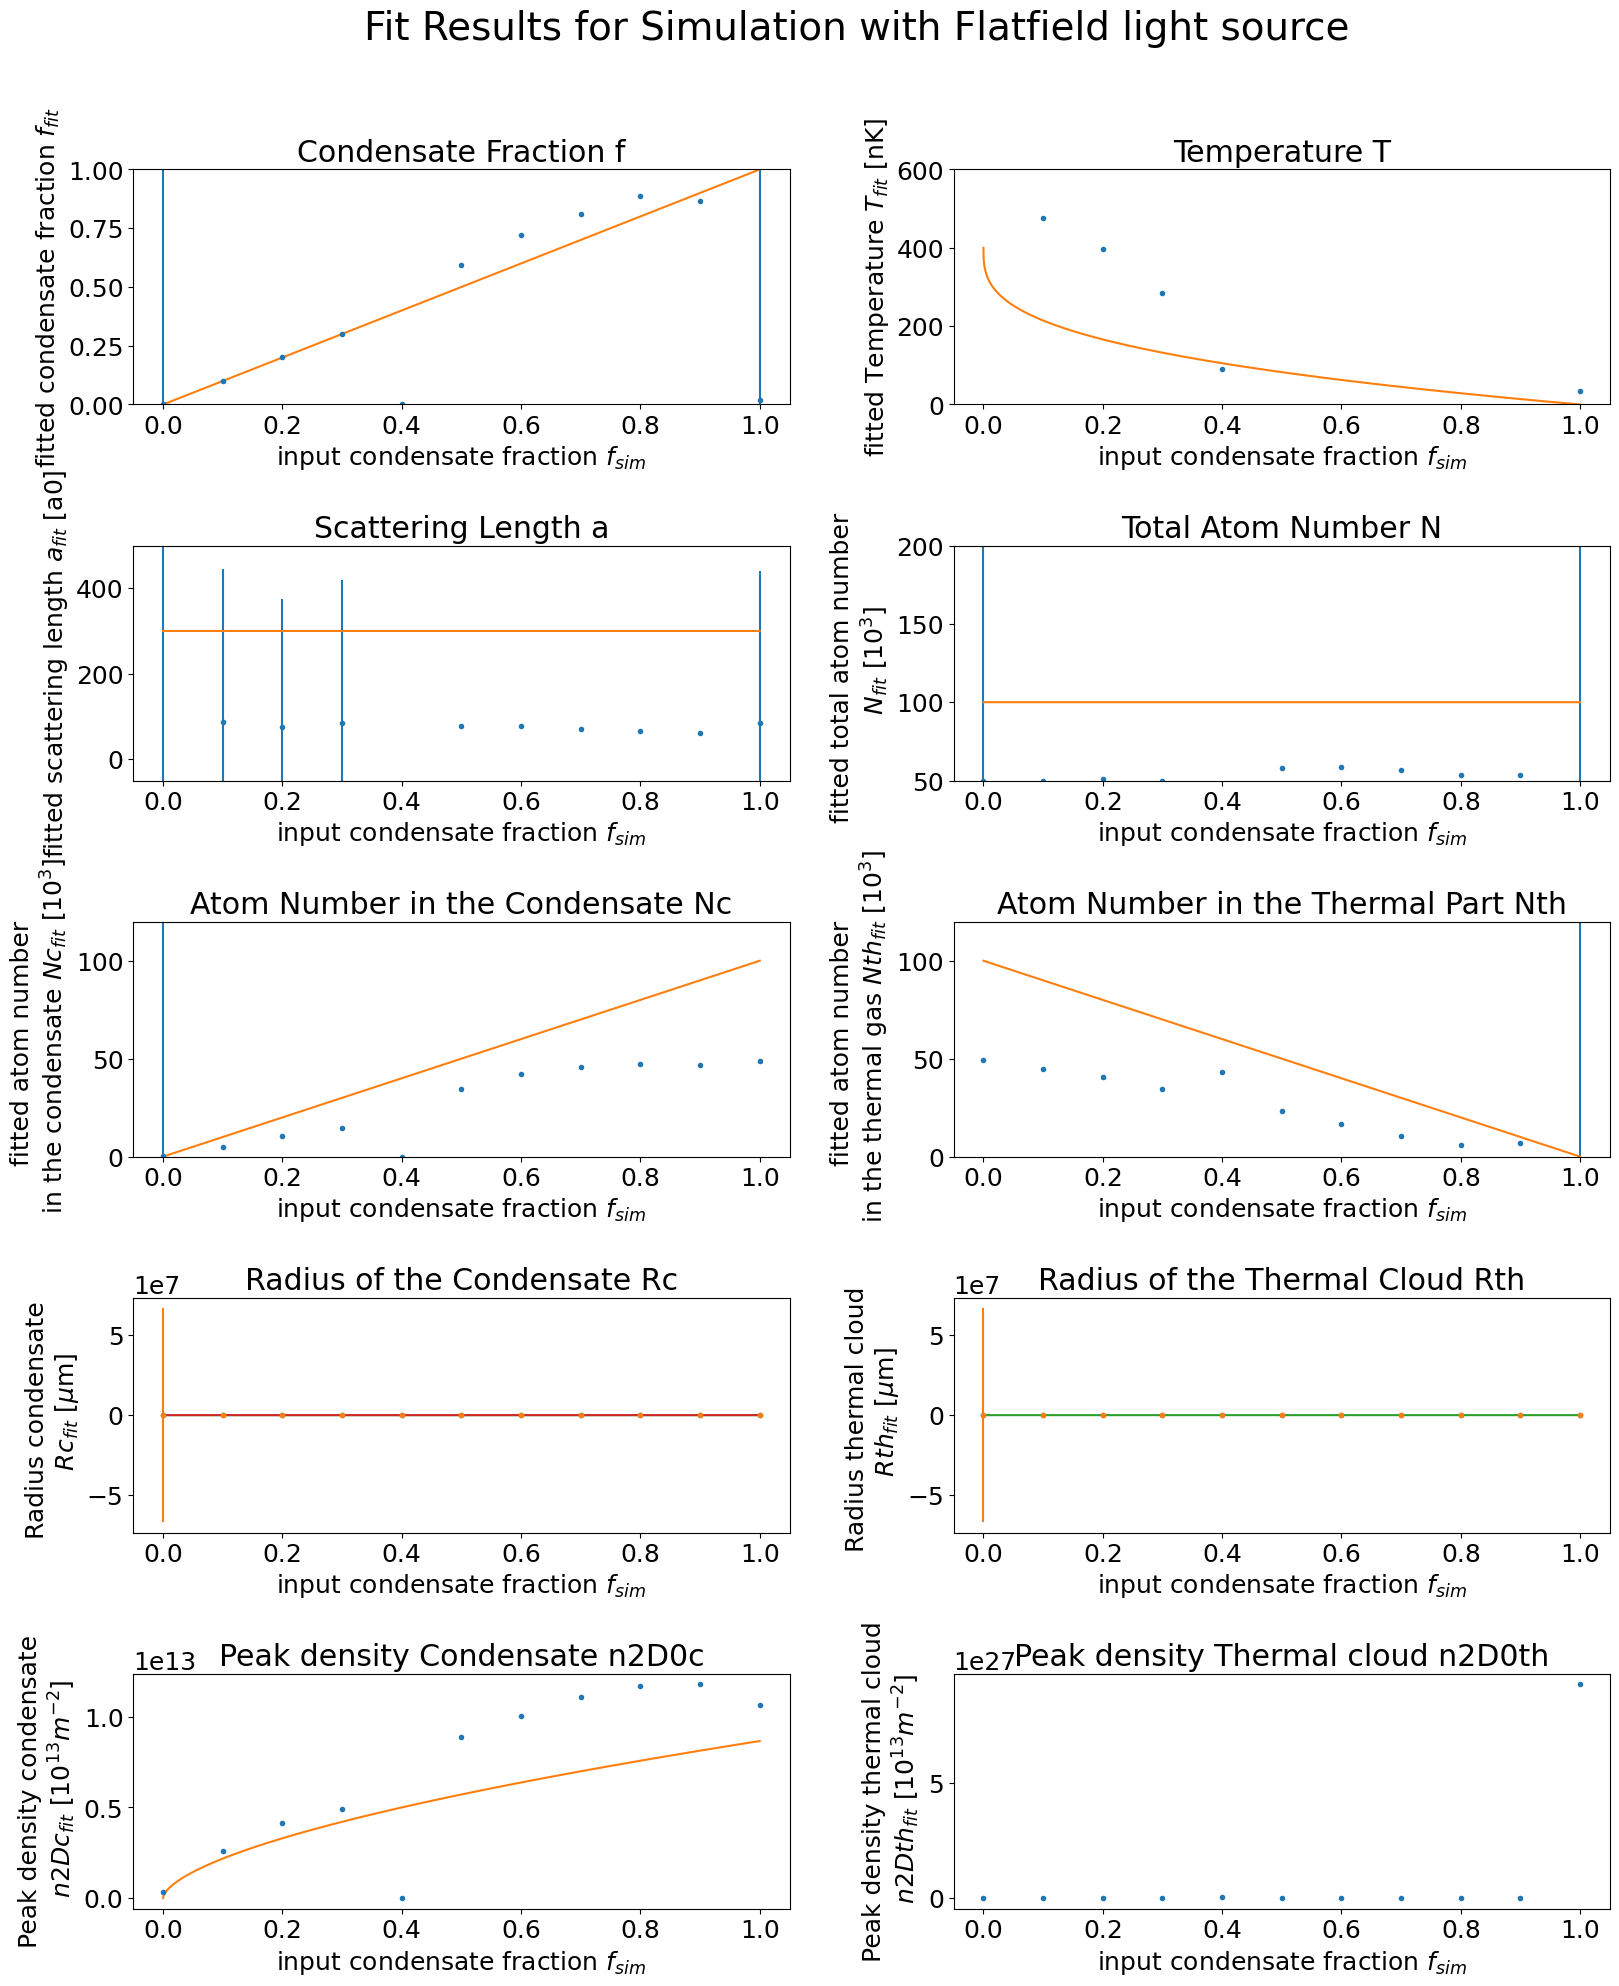

In [15]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (16,20))
fig.suptitle("Fit Results for Simulation with Flatfield light source", fontsize = 28)
fig.tight_layout(h_pad=4)
plt.subplots_adjust(wspace = 0.25, hspace = 0.6, top=0.9)

# Plot the results for f
x_axis = np.linspace(0, 1, 10000)

axs[0,0].errorbar(f, f_fit, fmt = '.', yerr = f_err)
axs[0,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[0,0].set_ylabel("fitted condensate fraction $f_{fit}$")
axs[0,0].set_ylim(0, 1)
axs[0,0].plot(x_axis, x_axis)
axs[0,0].set_title("Condensate Fraction f")

# Plot the results for T
Tc = 400e-9                             
T_sim = (np.ones(len(x_axis))-x_axis**(1/3)) * Tc     

axs[0,1].errorbar(f, T_fit/1e-9, fmt = '.', yerr = T_err)
axs[0,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[0,1].set_ylabel("fitted Temperature $T_{fit}$ [nK]")
axs[0,1].set_ylim(0, 600)
axs[0,1].plot(x_axis,  T_sim/1e-9)
axs[0,1].set_title("Temperature T")

# Plot the results for a

axs[1,0].errorbar(f, a_fac_fit, fmt = '.', yerr = a_fac_err)
axs[1,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[1,0].set_ylim(-50, 500)
axs[1,0].set_ylabel("fitted scattering length $a_{fit}$ [a0]")
axs[1,0].plot(x_axis, np.ones(len(x_axis))*300)
axs[1,0].set_title("Scattering Length a")

# Plot the results for N

axs[1,1].errorbar(f, N_fit/1000, fmt = '.', yerr = N_err/1000)
axs[1,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[1,1].set_ylabel("fitted total atom number \n $N_{fit}$ [$10^3$]")
axs[1,1].set_ylim(0.5e5/1000, 2e5/1000)
axs[1,1].plot(x_axis, np.ones(len(x_axis))*1e5/1000)
axs[1,1].set_title("Total Atom Number N")

# plot the results for N condensate

axs[2,0].errorbar(f, Nc_fit/1000, fmt = '.', yerr = Nc_err/1000)
axs[2,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[2,0].set_ylabel("fitted atom number \n in the condensate $Nc_{fit}$ [$10^3$]")
axs[2,0].set_ylim(0, 1.2e5/1000)
axs[2,0].plot(x_axis, x_axis*1e5/1000)
axs[2,0].set_title("Atom Number in the Condensate Nc")

# Plot the results for N thermal

axs[2,1].errorbar(f, Nth_fit/1000, fmt = '.', yerr = Nth_err/1000)
axs[2,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[2,1].set_ylabel("fitted atom number \n in the thermal gas $Nth_{fit}$ [$10^3$]")
axs[2,1].set_ylim(0, 1.2e5/1000)
axs[2,1].plot(x_axis, 1e5*(np.ones(len(x_axis))-x_axis)/1000)
axs[2,1].set_title("Atom Number in the Thermal Part Nth")

# plot the results for R condensate

a = 300 * a0
N = 1e5
Rxc_sim = np.sqrt(const.hbar*omgy/m)*np.sqrt((1+omgy**2*tof**2)/omgy**2)*(15*N*x_axis*a/ahoy)**(1/5)
Ryc_sim = np.sqrt(const.hbar*omgx/m)*np.sqrt((1+omgx**2*tof**2)/omgx**2)*(15*N*x_axis*a/ahox)**(1/5)
axs[3,0].errorbar(f, Rxc_fit/1e-6, fmt = '.', yerr = Rxc_err/1e-6)
axs[3,0].errorbar(f, Ryc_fit/1e-6, fmt = '.', yerr = Ryc_err/1e-6)
axs[3,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[3,0].set_ylabel("Radius condensate \n $Rc_{fit}$ [$\mu$m]")
axs[3,0].plot(x_axis, Rxc_sim/1e-6)
axs[3,0].plot(x_axis, Ryc_sim/1e-6)
axs[3,0].set_title("Radius of the Condensate Rc")

# plot the results for R thermal

Rth_sim = np.sqrt(const.k*T_sim/m*(1/omg**2+tof**2))
axs[3,1].errorbar(f, Rxth_fit/1e-6, fmt = '.', yerr = Rxc_err/1e-6)
axs[3,1].errorbar(f, Ryth_fit/1e-6, fmt = '.', yerr = Ryc_err/1e-6)
axs[3,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[3,1].set_ylabel("Radius thermal cloud \n $Rth_{fit}$ [$\mu$m]")
axs[3,1].plot(x_axis, Rth_sim/1e-6)
axs[3,1].set_title("Radius of the Thermal Cloud Rth")

# plot the results for n2D condensate

mu = const.hbar*omg/2*(15*N*x_axis*a/aho)**(2/5)
g = 4*const.pi*const.hbar**2*a/m
Rzc = np.sqrt(const.hbar*omgz/m)*np.sqrt((1+omgz**2*tof**2)/omgz**2)*(15*N*x_axis*a/ahoz)**(1/5)
n2D0c_sim = 4/3*Rzc*mu/g*1/(1+omg**2*tof**2)**(3/2)
axs[4,0].errorbar(f, n2D0c_fit, fmt = '.', yerr = Rxc_err/1e-13)
axs[4,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[4,0].set_ylabel("Peak density condensate\n $n2Dc_{fit}$ [$10^{13}m^{-2}$]")
axs[4,0].plot(x_axis, n2D0c_sim)
axs[4,0].set_title("Peak density Condensate n2D0c")

# plot the results for n2D thermal

# n2D0th_sim = (1-x_axis)*N*integrate.nquad(lambda x,y: np.real(Li2_vec(np.exp(-(x/Rth_sim)**2-(y/Rth_sim)**2))), 
#                                             [[-6/np.sqrt(2)*Rth_sim, 6/np.sqrt(2)*Rth_sim], [-6/np.sqrt(2)*Rth_sim, 6/np.sqrt(2)*Rth_sim]])[0]**(-1) 
axs[4,1].errorbar(f, n2D0th_fit/1e-13, fmt = '.', yerr = Rxc_err/1e-13)
axs[4,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[4,1].set_ylabel("Peak density thermal cloud\n $n2Dth_{fit}$ [$10^{13} m^{-2}$]")
# axs[4,1].plot(x_axis, Rth_sim/1e-13)
axs[4,1].set_title("Peak density Thermal cloud n2D0th")

## Manual Light Source

In [16]:
# load the data
sim_fT_manual_np = np.load("C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_manual.npy")
sim_fT_manual_np = np.nan_to_num(sim_fT_manual_np)

# define axis
x = np.linspace(0, 1201, 1200)
y = np.linspace(0, 1921, 1920)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/QFBri/Code/analyseScript-Master III/Data/Simulations/OD_fT_manual.npy'

In [ ]:
# crop the data around the center to get manly the area of the cloud
sim_fT_manual_np = sim_fT_manual_np[0:12, 470:-470, 830:-830]

f = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x = x[470:-470]
y = y[830:-830]

In [ ]:
## perform the BEC fit

# set the fit Model
fitModel = DensityProfileBEC2dModel()
fitAnalyser = FitAnalyser(fitModel, fitDim=2)

fit_fT_manual_result = np.empty((11,12))
fit_fT_manual_std = np.empty((11,12))

# params = fitAnalyser.guess(data_sim, dask="parallelized")
params = fitAnalyser.fitModel.make_params()
params.add(name="A_amplitude", value=  1000, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_centerx", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_centery", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_sigmax", value= 23, max=  0, min=-np.inf, vary=True)
params.add(name="A_sigmay", value=  30, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_amplitude", value=  3300, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_centerx", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_centery", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_sigmax", value=  30, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_sigmay", value=  30, max=np.inf, min=-np.inf, vary=True)

for i in range (11):
    print(i)
    sim_fT_manual = xr.DataArray(
    data = sim_fT_manual_np[i], 
    dims = ["x", "y"],
    coords = dict(
        x = ("x", x),
        y = ("y", y),
        )
    )
    # perform the fit for one simulation with flatfield
    params = fitAnalyser.guess(sim_fT_manual, dask="parallelized")
    fitResult = fitAnalyser.fit(sim_fT_manual, params, dask="parallelized").load()
    fitCurve = fitAnalyser.eval(fitResult, x=x, y=y).load()
    fitValue = fitAnalyser.get_fit_value(fitResult)
    fitStd = fitAnalyser.get_fit_std(fitResult)
    # store the results as numpy array
    fit_fT_manual = fitCurve.to_numpy()
    fitValue_array = fitValue.to_array()
    fitStd_array = fitStd.to_array()
    fit_fT_manual_result[i] = fitValue_array.to_numpy()
    fit_fT_manual_std[i] = fitStd_array.to_numpy()
    # plot fit
    plt.figure(figsize=(12,8))
    plt.errorbar(x, sim_fT_manual_np[i,130], fmt = '.', label = "simulated data")
    plt.plot(x, fit_fT_manual[130], label = "BEC fit")
    plt.xlabel("y axis [px]")
    plt.ylabel("OD")
    plt.title("OD distribution cross-section \n f={}, mnanual light source".format(str(f[i])))
    plt.legend()
    plt.show()

In [ ]:
fit_fT_manual_result = fit_fT_manual_result.T
fit_fT_manual_std = fit_fT_manual_std.T

## calculate the peak densities and the radii
lam = 421e-9
sig0 = 3*lam**2/(2*np.pi)
eff_px_size = 2.493e-6


Rxc_fit = fit_fT_manual_result[6]*eff_px_size
Rxc_err = Rxc_fit*fit_fT_manual_std[6]/fit_fT_manual_std[6]
Ryc_fit = fit_fT_manual_result[7]*eff_px_size
Ryc_err = Ryc_fit*fit_fT_manual_std[7]/fit_fT_manual_result[7]
Rxth_fit = fit_fT_manual_result[8]*np.sqrt(2)*eff_px_size
Rxth_err = Rxth_fit*fit_fT_manual_std[8]/Rxth_fit*fit_fT_manual_result[8]
Ryth_fit = fit_fT_manual_result[9]*np.sqrt(2)*eff_px_size
Ryth_err = Ryth_fit*fit_fT_manual_std[9]/fit_fT_manual_result[9]
Nc_fit = fit_fT_manual_result[0]/sig0*eff_px_size*eff_px_size
Nc_err = Nc_fit*fit_fT_manual_std[0]/fit_fT_manual_result[0]
Nth_fit = fit_fT_manual_result[1]/sig0*eff_px_size*eff_px_size
Nth_err = Nth_fit*fit_fT_manual_std[1]/fit_fT_manual_result[1]
N_fit = Nc_fit + Nth_fit
N_err = np.sqrt(Nth_err**2 + Nc_err**2)
n2D0c_fit = Nc_fit*5/(2*np.pi*Rxc_fit*Ryc_fit)
n2D0th_fit =Nth_fit/(2*np.pi*1.20206*Rxth_fit/np.sqrt(2)*Ryth_fit/np.sqrt(2))
f_fit = fit_fT_manual_result[11]
f_err = fit_fT_manual_std[11]

## Assumed to be given
tof = 20e-3
omgx = 2*np.pi*200
omgy = 2*np.pi*100
omgz = 2*np.pi*200
omg = (omgx*omgy*omgz)**(1/3)
m = 164*const.u 
a0 = 4*np.pi*const.epsilon_0*const.hbar**2/(const.e**2*const.electron_mass)

## Calculate T
T_x_fit = Rxth_fit**2*m/(const.k)*(1/omg**2+tof**2)**(-1)
T_x_err = T_x_fit * 2*Rxth_err/Rxth_fit
T_y_fit = Ryth_fit**2*m/(const.k)*(1/omg**2+tof**2)**(-1)
T_y_err = T_y_fit * 2*Ryth_err/Ryth_fit
T_fit = (T_x_fit + T_y_fit)/2
T_err = 1/2*np.sqrt(T_x_err**2+T_y_err**2)

## Calculate scattering lenght a
aho = np.sqrt(const.hbar/(m*omg))
ahox = np.sqrt(const.hbar/(m*omgx))
ahoy = np.sqrt(const.hbar/(m*omgy))
ahoz = np.sqrt(const.hbar/(m*omgz))
a_x = Ryc_fit**5*ahox/(15*Nc_fit)*(const.hbar*omgx/m*(1+omgx**2*tof**2)/omgx**2)**(-5/2)
a_x_err = a_x*5*Ryc_err/Ryc_fit
a_y = Rxc_fit**5*ahoy/(15*Nc_fit)*(const.hbar*omgy/m*(1+omgy**2*tof**2)/omgy**2)**(-5/2)
a_y_err = a_y*5*Rxc_err/Rxc_fit
a_fac_fit = (a_x+a_y)/2/a0
a_fac_err =1/2/a0*np.sqrt(a_x_err**2+a_y_err**2)

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (16,20))
fig.suptitle("Fit Results for Simulation with manual light source", fontsize = 28)
fig.tight_layout(h_pad=4)
plt.subplots_adjust(wspace = 0.25, hspace = 0.6, top=0.9)

# Plot the results for f
x_axis = np.linspace(0, 1, 10000)

axs[0,0].errorbar(f, f_fit, fmt = '.', yerr = f_err)
axs[0,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[0,0].set_ylabel("fitted condensate fraction $f_{fit}$")
axs[0,0].set_ylim(0, 1)
axs[0,0].plot(x_axis, x_axis)
axs[0,0].set_title("Condensate Fraction f")

# Plot the results for T
Tc = 400e-9                             
T_sim = (np.ones(len(x_axis))-x_axis**(1/3)) * Tc     

axs[0,1].errorbar(f, T_fit/1e-9, fmt = '.', yerr = T_err)
axs[0,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[0,1].set_ylabel("fitted Temperature $T_{fit}$ [nK]")
axs[0,1].set_ylim(0, 600)
axs[0,1].plot(x_axis,  T_sim/1e-9)
axs[0,1].set_title("Temperature T")

# Plot the results for a

axs[1,0].errorbar(f, a_fac_fit, fmt = '.', yerr = a_fac_err)
axs[1,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[1,0].set_ylim(-50, 500)
axs[1,0].set_ylabel("fitted scattering length $a_{fit}$ [a0]")
axs[1,0].plot(x_axis, np.ones(len(x_axis))*300)
axs[1,0].set_title("Scattering Length a")

# Plot the results for N

axs[1,1].errorbar(f, N_fit/1000, fmt = '.', yerr = N_err/1000)
axs[1,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[1,1].set_ylabel("fitted total atom number \n $N_{fit}$ [$10^3$]")
axs[1,1].set_ylim(0.5e5/1000, 2e5/1000)
axs[1,1].plot(x_axis, np.ones(len(x_axis))*1e5/1000)
axs[1,1].set_title("Total Atom Number N")

# plot the results for N condensate

axs[2,0].errorbar(f, Nc_fit/1000, fmt = '.', yerr = Nc_err/1000)
axs[2,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[2,0].set_ylabel("fitted atom number \n in the condensate $Nc_{fit}$ [$10^3$]")
axs[2,0].set_ylim(0, 1.2e5/1000)
axs[2,0].plot(x_axis, x_axis*1e5/1000)
axs[2,0].set_title("Atom Number in the Condensate Nc")

# Plot the results for N thermal

axs[2,1].errorbar(f, Nth_fit/1000, fmt = '.', yerr = Nth_err/1000)
axs[2,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[2,1].set_ylabel("fitted atom number \n in the thermal gas $Nth_{fit}$ [$10^3$]")
axs[2,1].set_ylim(0, 1.2e5/1000)
axs[2,1].plot(x_axis, 1e5*(np.ones(len(x_axis))-x_axis)/1000)
axs[2,1].set_title("Atom Number in the Thermal Part Nth")

# plot the results for R condensate

a = 300 * a0
N = 1e5
Rxc_sim = np.sqrt(const.hbar*omgy/m)*np.sqrt((1+omgy**2*tof**2)/omgy**2)*(15*N*x_axis*a/ahoy)**(1/5)
Ryc_sim = np.sqrt(const.hbar*omgx/m)*np.sqrt((1+omgx**2*tof**2)/omgx**2)*(15*N*x_axis*a/ahox)**(1/5)
axs[3,0].errorbar(f, Rxc_fit/1e-6, fmt = '.', yerr = Rxc_err/1e-6)
axs[3,0].errorbar(f, Ryc_fit/1e-6, fmt = '.', yerr = Ryc_err/1e-6)
axs[3,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[3,0].set_ylabel("Radius condensate \n $Rc_{fit}$ [$\mu$m]")
axs[3,0].plot(x_axis, Rxc_sim/1e-6)
axs[3,0].plot(x_axis, Ryc_sim/1e-6)
axs[3,0].set_title("Radius of the Condensate Rc")

# plot the results for R thermal

Rth_sim = np.sqrt(const.k*T_sim/m*(1/omg**2+tof**2))
axs[3,1].errorbar(f, Rxth_fit/1e-6, fmt = '.', yerr = Rxc_err/1e-6)
axs[3,1].errorbar(f, Ryth_fit/1e-6, fmt = '.', yerr = Ryc_err/1e-6)
axs[3,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[3,1].set_ylabel("Radius thermal cloud \n $Rth_{fit}$ [$\mu$m]")
axs[3,1].plot(x_axis, Rth_sim/1e-6)
axs[3,1].set_title("Radius of the Thermal Cloud Rth")

# plot the results for n2D condensate

mu = const.hbar*omg/2*(15*N*x_axis*a/aho)**(2/5)
g = 4*const.pi*const.hbar**2*a/m
Rzc = np.sqrt(const.hbar*omgz/m)*np.sqrt((1+omgz**2*tof**2)/omgz**2)*(15*N*x_axis*a/ahoz)**(1/5)
n2D0c_sim = 4/3*Rzc*mu/g*1/(1+omg**2*tof**2)**(3/2)
axs[4,0].errorbar(f, n2D0c_fit, fmt = '.', yerr = Rxc_err/1e-13)
axs[4,0].set_xlabel("input condensate fraction $f_{sim}$")
axs[4,0].set_ylabel("Peak density condensate\n $n2Dc_{fit}$ [$10^{13}m^{-2}$]")
axs[4,0].plot(x_axis, n2D0c_sim)
axs[4,0].set_title("Peak density Condensate n2D0c")

# plot the results for n2D thermal

# n2D0th_sim = (1-x_axis)*N*integrate.nquad(lambda x,y: np.real(Li2_vec(np.exp(-(x/Rth_sim)**2-(y/Rth_sim)**2))), 
#                                             [[-6/np.sqrt(2)*Rth_sim, 6/np.sqrt(2)*Rth_sim], [-6/np.sqrt(2)*Rth_sim, 6/np.sqrt(2)*Rth_sim]])[0]**(-1) 
axs[4,1].errorbar(f, n2D0th_fit/1e-13, fmt = '.', yerr = Rxc_err/1e-13)
axs[4,1].set_xlabel("input condensate fraction $f_{sim}$")
axs[4,1].set_ylabel("Peak density thermal cloud\n $n2Dth_{fit}$ [$10^{13} m^{-2}$]")
# axs[4,1].plot(x_axis, Rth_sim/1e-13)
axs[4,1].set_title("Peak density Thermal cloud n2D0th")

# plt.savefig("C:/Users/QFBri/Code/analyseScript-Master III/Data/Fit_Results/FitResults_fT_flatfield_PureBECThreshold{}.jpg".format(str(PureBECThreshold*10)), dpi = 300, bbox_inches='tight')

## Real Data

In [ ]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_1",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_2",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_3",
}

img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + '2023/05/12'# get_date()

shotNum = "0065"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in [0] # range(len(groupList))
}

dataSet = dataSetDict["camera_1"]
dataSet = swap_xy(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

dataSet

OD = dataSet["OD"]

OD_np = OD.to_numpy()

dataSet

In [ ]:
# crop image
OD_np = OD_np[6, 151:451, 800:1100]
y = np.linspace(800, 1100, 300)
x = np.linspace(151, 451, 300)
plt.imshow(OD_np)

In [ ]:
## perform the BEC fit

# set the fit Model
fitModel = DensityProfileBEC2dModel()
fitAnalyser = FitAnalyser(fitModel, fitDim=2)

OD = xr.DataArray(
    data = OD_np, 
    dims = ["x", "y"],
    coords = dict(
        x = ("x", x),
        y = ("y", y),
        )
    )

# perform the fit for one simulation with flatfield
params = fitAnalyser.guess(OD, dask="parallelized", guess_kwargs=dict(pureBECThreshold=0.6))
'''
params = fitAnalyser.fitModel.make_params()
params.add(name="A_amplitude", value=  1000, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_centerx", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_centery", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="A_sigmax", value= 23, max=  0, min=-np.inf, vary=True)
params.add(name="A_sigmay", value=  30, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_amplitude", value=  3300, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_centerx", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_centery", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_sigmax", value=  30, max=np.inf, min=-np.inf, vary=True)
params.add(name="B_sigmay", value=  30, max=np.inf, min=-np.inf, vary=True)
'''
fitResult = fitAnalyser.fit(OD, params, dask="parallelized").load()
fitCurve = fitAnalyser.eval(fitResult, x=x, y=y).load()
fitValue = fitAnalyser.get_fit_value(fitResult)
fitStd = fitAnalyser.get_fit_std(fitResult)

# store the results as numpy array
fit = fitCurve.to_numpy()
fitValue_array = fitValue.to_array()
fitStd_array = fitStd.to_array()
fit_result = fitValue_array.to_numpy()
fit_std = fitStd_array.to_numpy()

In [ ]:
# print(np.shape(OD_np))
plt.figure(figsize = (12, 8))
plt.plot(x, OD_np[135], marker = "o", linewidth = 0)
plt.plot(x, fit[135], label = "BEC fit")
plt.xlabel("pixel")
plt.ylabel("OD")
plt.title("Simulated Data")
plt.xlabel("y axis [px]")
plt.ylabel("OD")
plt.title("OD distribution cross-section \n real Data")
plt.legend()
plt.show()

In [ ]:
from Analyser.FitAnalyser import ThomasFermi2dModel, Polylog22dModel

# fitModel_draw = ThomasFermi2dModel(prefix='BEC_')
fitModel_draw = Polylog22dModel(prefix='thermal_')

fitAnalyser_draw = FitAnalyser(fitModel_draw, fitDim=2)

fitCurve = fitAnalyser_draw.eval(fitResult, x=x, y=y).load()

fit = fitCurve.to_numpy()

# print(np.shape(OD_np))
plt.figure(figsize = (12, 8))
plt.plot(x, OD_np[135], marker = "o", linewidth = 0)
plt.plot(x, fit[135], label = "BEC fit")
plt.xlabel("pixel")
plt.ylabel("OD")
plt.title("Simulated Data")
plt.xlabel("y axis [px]")
plt.ylabel("OD")
plt.title("OD distribution cross-section \n real Data")
plt.legend()
plt.show()

In [ ]:
fitAnalyser.get_fit_full_result(fitResult)

In [ ]:
fitValue

In [ ]:
print("sigxc:", fit_result[6])
print("sigyc:", fit_result[7])
print("sigxth:", fit_result[8])
print("sigyth:", fit_result[9])
print("BEC amplitude", fit_result[0])
print("thermal amplitude:", fit_result[1])
print("condensate fraction:", fit_result[11])